In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


In [ ]:
df=pd.read_csv('data.csv')
pd.set_option('display.max_rows',None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   applicant_name   325 non-null    object 
 1   Age              281 non-null    float64
 2   Ответ на вопрос  325 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.7+ KB
None


In [ ]:
print(df.head(10))

  applicant_name   Age   Ответ на вопрос
0         name_0  49.0               нет
1         name_1  37.0                да
2         name_2  18.0               нет
3         name_3  36.0  неверное решение
4         name_4  31.0                да
5         name_5  36.0                да
6         name_6  27.0               нет
7         name_7  36.0                да
8         name_8   NaN               нет
9         name_9  21.0                да


In [ ]:
df=df.rename(columns={'Ответ на вопрос':'Answer'}) #переименуем колонку для красоты
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   applicant_name  325 non-null    object 
 1   Age             281 non-null    float64
 2   Answer          325 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.7+ KB
None


In [ ]:
print(df.describe()) #сделаем срез данных,чтобы посмотреть аномалии

              Age
count  281.000000
mean    26.800712
std     11.999232
min     15.000000
25%     21.000000
50%     24.000000
75%     31.000000
max    186.000000


In [ ]:
#Заменим аномальные и пустые значения возраста( < 18 лет и >= 65 лет) в колонке Age на медиану,т.к.рассматриваем совершеннолетних граждан до пенсионного возраста

age_median=df['Age'].median()
df['Age']=np.where(df['Age']< 18,age_median,df['Age'])
df['Age']=np.where(df['Age'] >= 65 ,age_median,df['Age'])
df['Age']=df['Age'].fillna(age_median)

In [ ]:
df['Age']=df['Age'].astype(int)

In [ ]:
print(df.describe())

              Age
count  325.000000
mean    25.966154
std      6.309563
min     18.000000
25%     21.000000
50%     24.000000
75%     29.000000
max     50.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   applicant_name  325 non-null    object
 1   Age             325 non-null    int64 
 2   Answer          325 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.7+ KB
None


In [ ]:
#разобъем соискателей на группы по возрасту
bins=[0,19,29,39,49,65]
labels=['<20','20-29','30-39','40-49','50+']
df['Age_group']=pd.cut(df['Age'],bins=bins,labels=labels,right=True)
age_group_count=df['Age_group'].value_counts().sort_index()
print(age_group_count)

Age_group
<20       32
20-29    215
30-39     64
40-49     13
50+        1
Name: count, dtype: int64


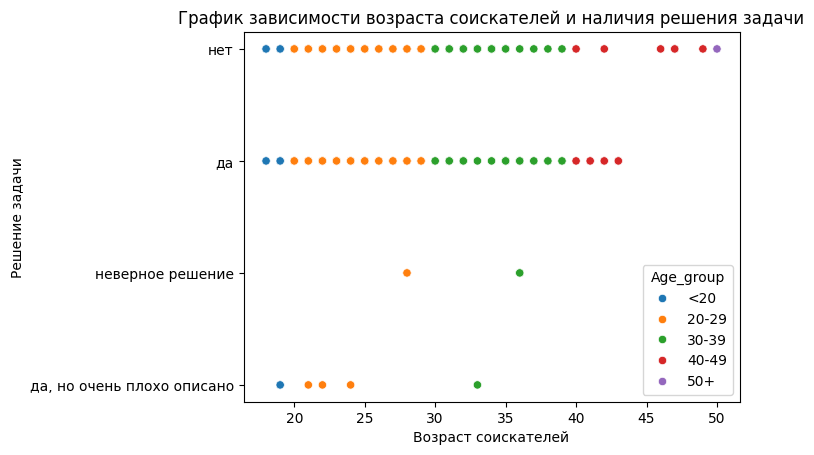

In [ ]:
sb.scatterplot(data=df,x=df['Age'],y=df['Answer'],hue=df['Age_group'])
plt.title('График зависимости возраста соискателей и наличия решения задачи')
plt.xlabel('Возраст соискателей')
plt.ylabel('Решение задачи')
plt.show()

Судя по графику,наличие или отсутствие решения задачи не зависит от возраста соискателя